In [67]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout
import random

In [68]:
np.random.seed(0)

In [69]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [70]:
assert(X_train.shape[0] == y_train.shape[0]), "the no. of images != no. of labels"
assert(X_test.shape[0] == y_test.shape[0]), "the no. of images != no. of labels"
assert(X_train.shape[1:] == (28, 28)), "the dimensions of images are not 28x28"
assert(X_test.shape[1:] == (28, 28)), "the dimensions of images are not 28x28"

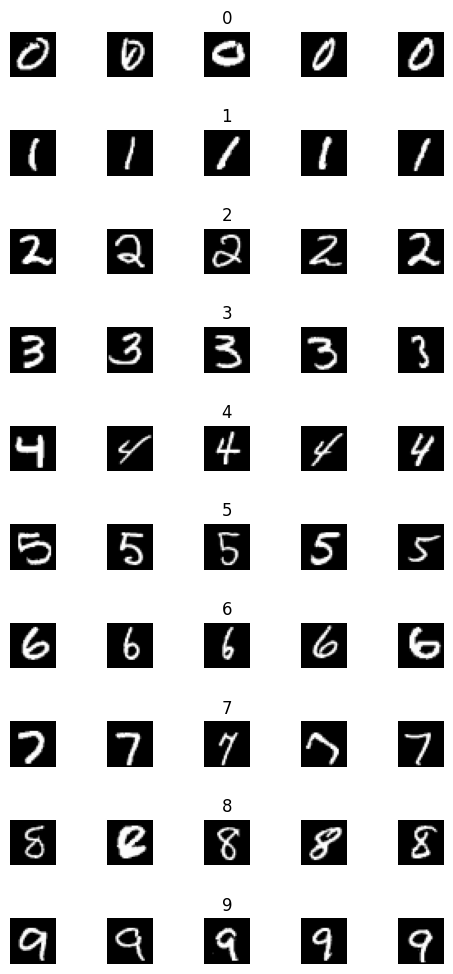

In [71]:
num_of_samples = []
cols = 5
num_of_classes = 10
fig, axes = plt.subplots(nrows=num_of_classes, ncols=cols, figsize=(5, 10))
fig.tight_layout()
for col in range(cols):
  for i in range(num_of_classes):
    x_selected = X_train[y_train == i]
    axes[i][col].imshow(x_selected[random.randint(0, len(x_selected - 1))], cmap=plt.get_cmap("gray"))
    axes[i][col].axis("off")
    if col == 2:
      axes[i][col].set_title(str(i))
      num_of_samples.append(len(x_selected))

Text(0, 0.5, 'no. of images')

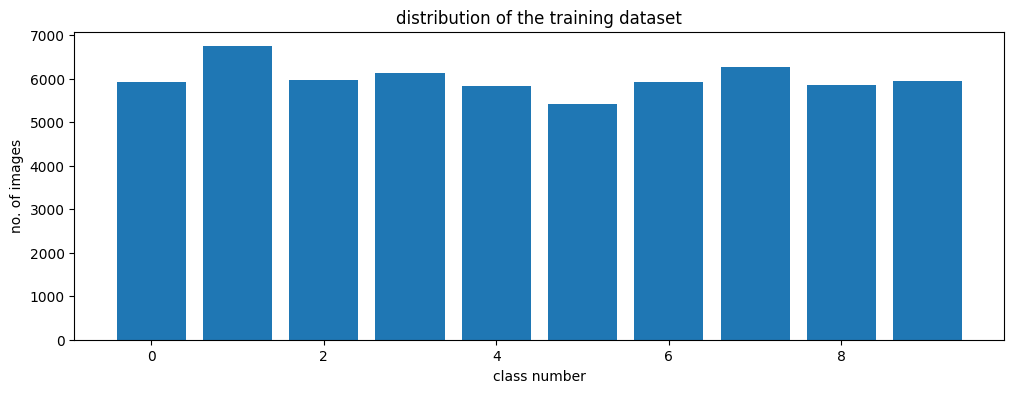

In [72]:
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_of_classes), num_of_samples)
plt.title("distribution of the training dataset")
plt.xlabel("class number")
plt.ylabel("no. of images")

In [73]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [74]:
#hot-encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [75]:
X_train = X_train/255
X_test = X_test/255

In [57]:
#lenet_model
def lenet_model():
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(15, (3, 3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(num_of_classes, activation="softmax"))
  model.compile(Adam(learning_rate=0.01), loss="categorical_crossentropy", metrics=["accuracy"])
  return model

In [58]:
model = lenet_model()
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 30)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 375)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       188,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,855 (772.87 KB)

 Trainable params: 197,855 (772.87 KB)

 Non-trainable params: 0 (0.00 B)

None


In [59]:
h = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 38s 264ms/step - accuracy: 0.8310 - loss: 0.4976 - val_accuracy: 0.9830 - val_loss: 0.0569
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 42s 273ms/step - accuracy: 0.9775 - loss: 0.0725 - val_accuracy: 0.9873 - val_loss: 0.0456
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 40s 262ms/step - accuracy: 0.9823 - loss: 0.0549 - val_accuracy: 0.9890 - val_loss: 0.0463
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 41s 263ms/step - accuracy: 0.9852 - loss: 0.0470 - val_accuracy: 0.9893 - val_loss: 0.0395
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 41s 261ms/step - accuracy: 0.9858 - loss: 0.0446 - val_accuracy: 0.9892 - val_loss: 0.0397
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 43s 277ms/step - accuracy: 0.9887 - loss: 0.0388 - val_accuracy: 0.9902 - val_loss: 0.0430
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 39s 265ms/step - accuracy: 0.9879 - loss: 0.0386 - val_accuracy: 0.9908 - val_loss: 0.0407
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 36s 268ms/step - accuracy: 0.9887 - loss: 0

Text(0.5, 0, 'epoch')

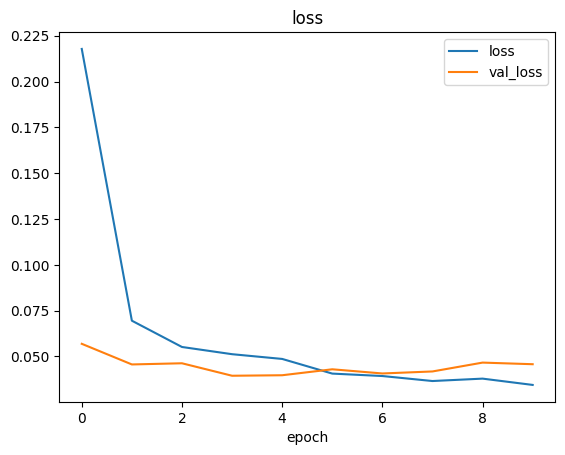

In [60]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

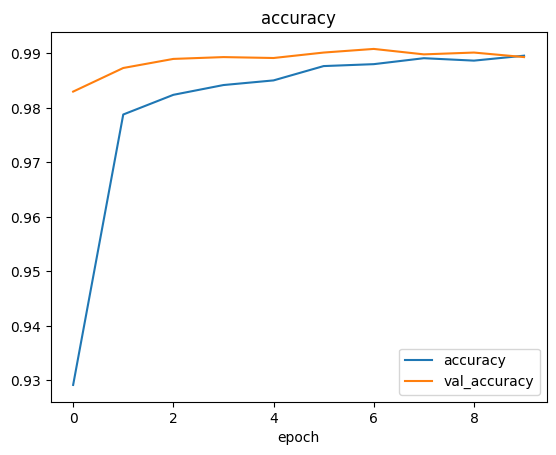

In [61]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')

In [62]:
score = model.evaluate(X_test, y_test, verbose=0)
print('test score: ', score[0])
print('test accuracy: ', score[1])

test score:  0.04258369281888008
test accuracy:  0.9889000058174133


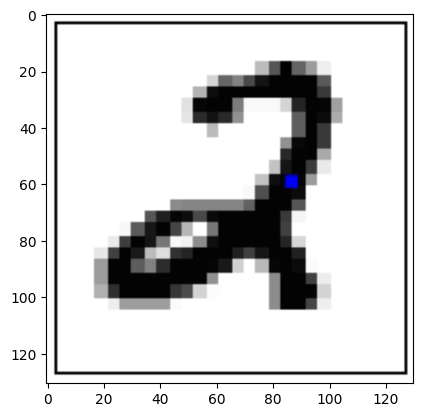

In [63]:
import requests
from PIL import Image

url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

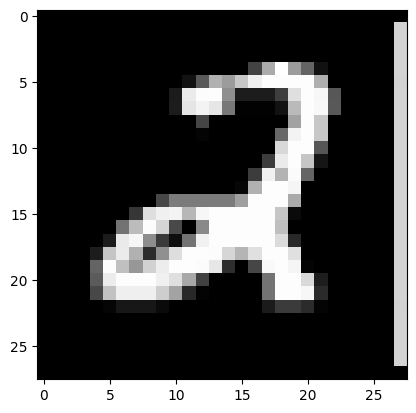

In [64]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [65]:
image = image/255
image = image.reshape(1, 28, 28, 1)

In [66]:
predictions = model.predict(image)
prediction = np.argmax(predictions, axis=1)
print("predicted digit: ", str(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
predicted digit:  [2]


In [78]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


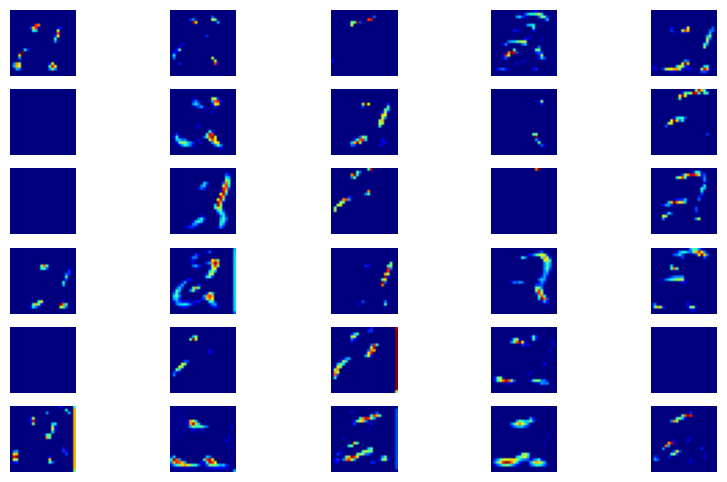

In [83]:
#outputs of first layer
plt.figure(figsize=(10, 6))
for i in range(30):
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap("jet"))
  plt.axis("off")

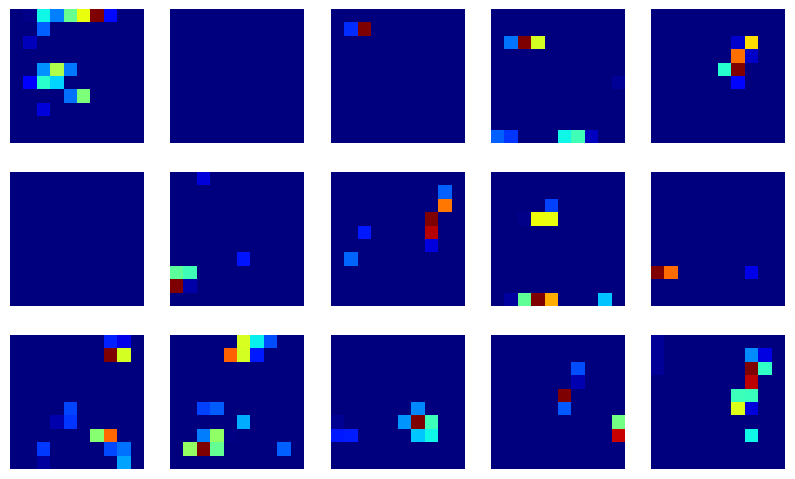

In [84]:
#outputs of second layer
plt.figure(figsize=(10, 6))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap("jet"))
  plt.axis("off")